In [1]:
from wdm_wavelet.wdm import WDM

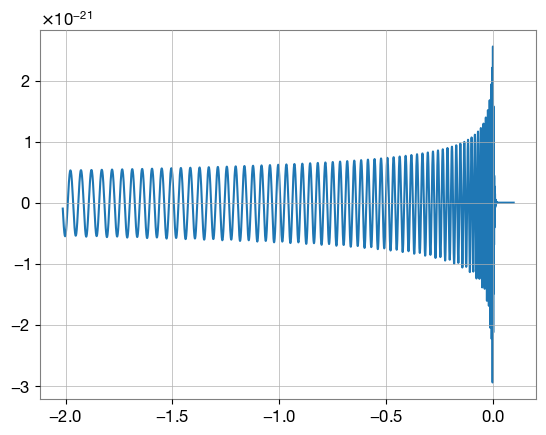

In [2]:
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt

hp, hc = get_td_waveform(approximant="IMRPhenomTPHM",
                         mass1=20,
                         mass2=20,
                         spin1z=0.9,
                         spin2z=0.4,
                         inclination=1.23,
                         coa_phase=2.45,
                         distance=100,
                         delta_t=1.0/2048,
                         f_lower=20)

hp.plot()
plt.show()

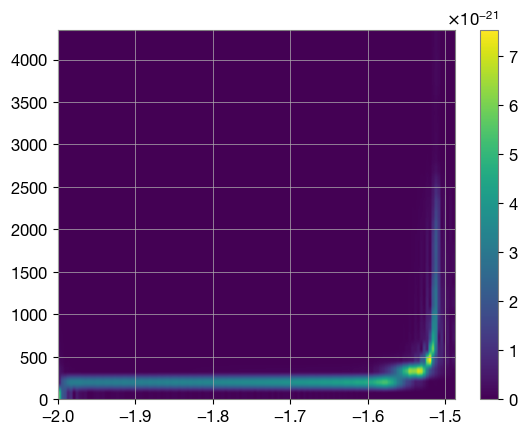

In [3]:
import numpy as np

wdm = WDM(32, 64, 6, 10)

tf_map, tf_meta = wdm.t2w(hp.data, sample_rate=hp.sample_rate, t0=int(hp.start_time))
norm = np.sqrt(tf_map[0]**2 + tf_map[1]**2)

# Spectrogram(norm, t0=tf_meta['t0'], dt=tf_meta['dt'], f0=0, df=tf_meta['df']).plot()
plt.imshow(norm.T, aspect='auto', origin='lower', extent=[tf_meta['t0'], tf_meta['t0'] + tf_meta['dt']*len(norm[0]), 0, tf_meta['df']*len(norm)])
plt.colorbar()
plt.show()